In [86]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

Loading the Dataset

In [87]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [88]:
#delete ID
df = df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [89]:
#to display stats about data
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [90]:
#to display basic info about datatypes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [91]:
#to display no of samples in each class
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

Preprocessing The Data

In [92]:
#to check for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Exploratory Data Analysis

<Axes: >

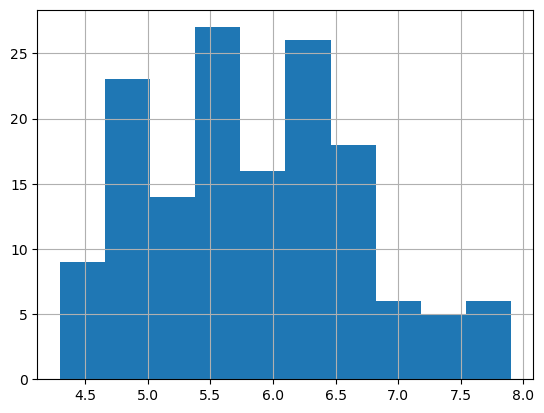

In [93]:
#histograms
df['SepalLengthCm'].hist()

<Axes: >

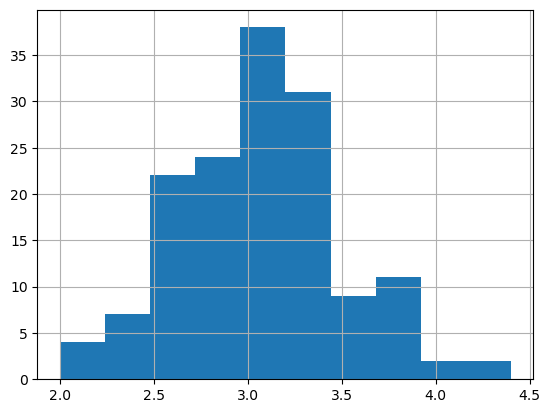

In [94]:
df['SepalWidthCm'].hist()

<Axes: >

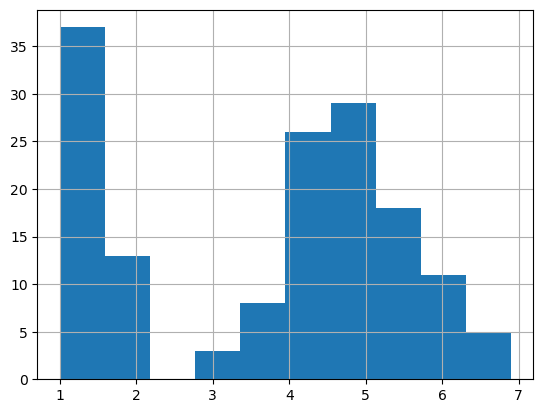

In [95]:
df['PetalLengthCm'].hist()

<Axes: >

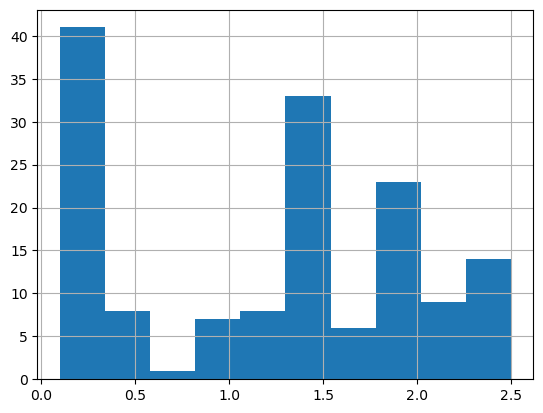

In [96]:
df['PetalWidthCm'].hist()

In [97]:
#Scatterplot
colors = ['red', 'blue', 'yellow']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

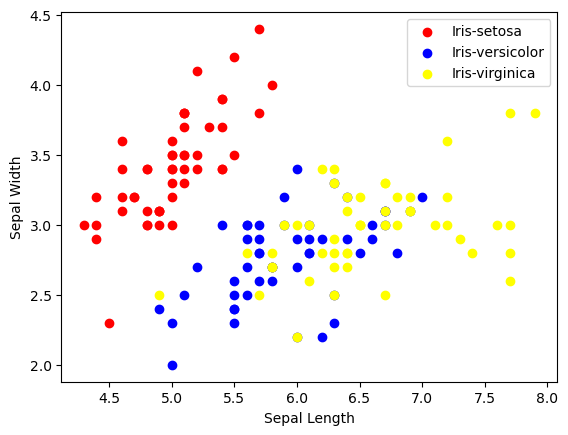

In [98]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['SepalLengthCm'], x['SepalWidthCm'], c=colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()

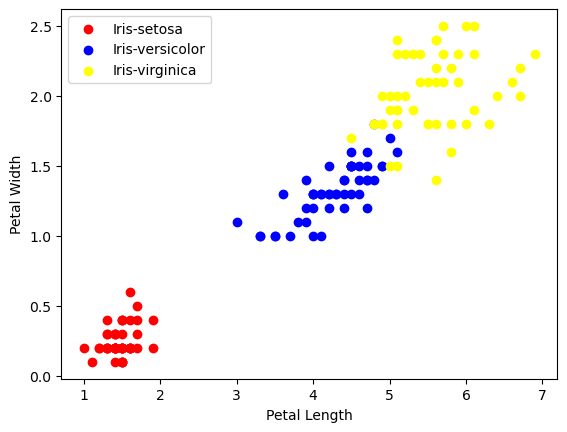

In [99]:
for i in range(3):
    x = df[df['Species'] == species[i]]
    plt.scatter(x['PetalLengthCm'],x['PetalWidthCm'], c = colors[i], label=species[i])
    plt.xlabel("Petal Length")
    plt.ylabel("Petal Width")
    plt.legend()

Correlation Matrix

In [100]:
df.corr()

C:\Users\sharv\AppData\Local\Temp\ipykernel_22324\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


C:\Users\sharv\AppData\Local\Temp\ipykernel_22324\2060629659.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

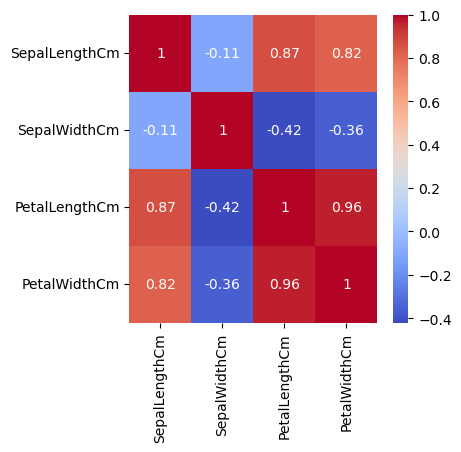

In [101]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(corr, annot=True, ax=ax, cmap='coolwarm')

Label Encoder

In [102]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()


In [103]:
# df['Species'] = le.fit_transform(df['Species'])
# df.head()

Model Training

In [104]:
from sklearn.model_selection import train_test_split
# train - 70
# test - 30
X = df.drop(columns=['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)

In [105]:
# logistic regression 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [106]:
# model training
model.fit(x_train, y_train)

LogisticRegression()

In [107]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  93.33333333333333


In [108]:
# knn - k-nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier()

In [109]:
model1.fit(x_train, y_train)

KNeighborsClassifier()

In [110]:
# print metric to get performance
print("Accuracy: ",model1.score(x_test, y_test) * 100)

Accuracy:  91.11111111111111


In [111]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [112]:
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [113]:
# print metric to get performance
print("Accuracy: ",model.score(x_test, y_test) * 100)

Accuracy:  88.88888888888889


In [114]:
# save the model
import pickle
filename = 'savedmodel.sav'
pickle.dump(model, open(filename, 'wb'))

In [115]:
x_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
126,6.2,2.8,4.8,1.8
22,4.6,3.6,1.0,0.2
99,5.7,2.8,4.1,1.3
10,5.4,3.7,1.5,0.2
57,4.9,2.4,3.3,1.0


In [116]:
load_model = pickle.load(open(filename,'rb'))

In [117]:
load_model.predict([[6.0, 2.2, 4.0, 1.0]])

C:\Users\sharv\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Iris-versicolor'], dtype=object)